<h1>Análisis exploratorio de Datos de Automoviles<h1>

En primer lugar es necesario conocer: el tipo de atributos o campos por el cual estan compuesto los datos.

<h6>Importación de datos<h6>

In [1]:
import pandas as pd

In [2]:
directorio = './Automobile_data.csv'
carros = pd.read_csv(directorio)
carros.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
print('Número de filas: ', carros.shape[0])
print('Número de columnas', carros.shape[1])


Número de filas:  205
Número de columnas 26


In [4]:
print('Columnas: ', carros.columns.tolist())

Columnas:  ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


In [5]:
print('Valores Faltantes: ', carros.isnull().values.sum())

""" Se puede observar que indica no tener valores como NaN 
o NA, pero en realidad si existe valores faltantes solo que 
estan con este simbolo: ? """

Valores Faltantes:  0


' Se puede observar que indica no tener valores como NaN \no NA, pero en realidad si existe valores faltantes solo que \nestan con este simbolo: ? '

In [6]:
print('Valores unicos por campo:\n', carros.nunique())

Valores unicos por campo:
 symboling              6
normalized-losses     52
make                  22
fuel-type              2
aspiration             2
num-of-doors           3
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  39
stroke                37
compression-ratio     32
horsepower            60
peak-rpm              24
city-mpg              29
highway-mpg           30
price                187
dtype: int64


Explorando el tipo de variable que hay en el dataset

In [7]:
carros.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<h6>Limpiando aquellos datos que contienen, valores faltantes: ?<h6>

In [8]:
#Limpiando el campo horsepower, que contiene ?, siendo estos datos faltantes se lo reemplazará por la 
# media de los datos

horsepower = carros['horsepower'].loc[carros['horsepower'] != '?']

promedio_caballoDeFuerza = horsepower.astype(str).astype(int).mean()

carros['horsepower'] = carros['horsepower'].replace('?', promedio_caballoDeFuerza).astype(int)

carros['horsepower']

0      111
1      111
2      154
3      102
4      115
      ... 
200    114
201    160
202    134
203    106
204    114
Name: horsepower, Length: 205, dtype: int32

In [9]:
carros['bore'].loc[carros['bore'] == '?']

55    ?
56    ?
57    ?
58    ?
Name: bore, dtype: object

In [10]:
#Limpiando el campo bore

bore = carros['bore'].loc[carros['bore'] != '?']

promedio_bore = horsepower.astype(str).astype(int).mean()

carros['bore'] = pd.to_numeric(carros['bore'].replace('?', promedio_bore))

carros['bore']

0      3.47
1      3.47
2      2.68
3      3.19
4      3.19
       ... 
200    3.78
201    3.78
202    3.58
203    3.01
204    3.78
Name: bore, Length: 205, dtype: float64

In [11]:
carros['stroke'].loc[carros['stroke'] == '?']

55    ?
56    ?
57    ?
58    ?
Name: stroke, dtype: object

In [12]:
#Limpiando el campo stroke

stroke = carros['stroke'].loc[carros['stroke'] != '?']

promedio_stroke = horsepower.astype(str).astype(int).mean()

carros['stroke'] = pd.to_numeric(carros['stroke'].replace('?', promedio_stroke))

carros['stroke']

0      2.68
1      2.68
2      3.47
3      3.40
4      3.40
       ... 
200    3.15
201    3.15
202    2.87
203    3.40
204    3.15
Name: stroke, Length: 205, dtype: float64

In [13]:
#Limpiando el campo price

price = carros['price'].loc[carros['price'] != '?']

promedio_price = horsepower.astype(str).astype(int).mean()

carros['price'] = carros['price'].replace('?', promedio_price).astype(int)

carros['price']

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: int32

<h3>Analizando algunas variables mediante visualización<h3>

In [14]:
import seaborn as sns

In [15]:
carros.corr()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,city-mpg,highway-mpg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,0.243387,0.245694,-0.178515,0.071380,-0.035823,0.034606,-0.071558
wheel-base,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,-0.071701,-0.077550,0.249786,0.351985,-0.470414,-0.544082,0.578952
length,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,-0.046130,-0.054962,0.158414,0.554408,-0.670909,-0.704662,0.685139
width,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,-0.002876,-0.009600,0.181129,0.642176,-0.642704,-0.677218,0.696046
height,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,-0.235364,-0.239899,0.261214,-0.110114,-0.048640,-0.107358,0.158283
curb-weight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,-0.026640,-0.035407,0.151362,0.750973,-0.757414,-0.797465,0.800093
engine-size,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,-0.173430,-0.180169,0.028971,0.810705,-0.653658,-0.677470,0.838445
bore,0.243387,-0.071701,-0.046130,-0.002876,-0.235364,-0.026640,-0.173430,1.000000,0.999538,-0.026331,0.029910,-0.194353,-0.170502,0.011344
stroke,0.245694,-0.077550,-0.054962,-0.009600,-0.239899,-0.035407,-0.180169,0.999538,1.000000,-0.022263,0.020742,-0.183975,-0.160117,0.003156
compression-ratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,-0.026331,-0.022263,1.000000,-0.205717,0.324701,0.265201,0.077921


La correlación entre las siguientes columnas: diámetro interior, carrera, relación de compresión y potencia, pueden resultar ser más informativas.

In [16]:
carros[['bore', 'stroke', 'compression-ratio', 'horsepower', 'price']].corr() 

,bore,stroke,compression-ratio,horsepower,price
bore,1.000000,0.999538,-0.026331,0.029910,0.011344
stroke,0.999538,1.000000,-0.022263,0.020742,0.003156
compression-ratio,-0.026331,-0.022263,1.000000,-0.205717,0.077921
horsepower,0.029910,0.020742,-0.205717,1.000000,0.704104
price,0.011344,0.003156,0.077921,0.704104,1.000000


Existe una correlación alta psitiva entre bore y stroke, una correlacion positiva moderada entre horsepower y price, y la relación entre las demás es muy baja.

<h3>Diagrama de dispersión<h3>

*Diagrama de dispersión de "engine-size" and "price"*

<AxesSubplot:xlabel='engine-size', ylabel='price'>

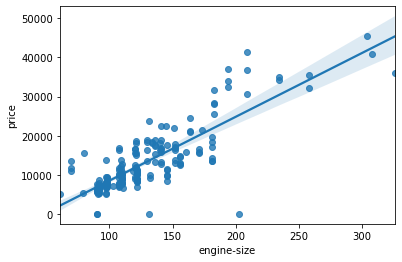

In [17]:
sns.regplot(x="engine-size", y="price", data=carros)

In [18]:
carros[['engine-size', 'price']].corr()

,engine-size,price
engine-size,1.000000,0.838445
price,0.838445,1.000000


Existe una correlación positiva entre el tamaño del motor y el precio, es decir que a medida que aumenta el tamaño del motor aumenta su precio.

*Diagrama de dispersión de "highway-mpg" and "price"*

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

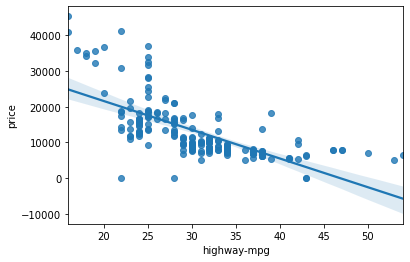

In [19]:
sns.regplot(x='highway-mpg', y='price', data=carros)

In [20]:
carros[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.687833
price,-0.687833,1.000000


Se puede observar que a medida que sube las millas por galon, el precio tiende a bajar, es decir hay una correlacion negativa entre estas dos variables.

<h3>Coeficiente de correlación de Pearson y el valor P-value<h3>

In [21]:
from scipy import stats

<b>Wheel-base vs Price

In [22]:
pearson_coef, p_value = stats.pearsonr(carros['wheel-base'], carros['price'])
print('Coeficiente de correlación de Pearson es ', pearson_coef, ' con un p-value de ', p_value)

Coeficiente de correlación de Pearson es  0.5789521588486121  con un p-value de  9.66052955977139e-20


<b>Horsepower vs Price

In [23]:
pearson_coef, p_value = stats.pearsonr(carros['horsepower'], carros['price'])
print('Coeficiente de correlación de Pearson es ', pearson_coef, ' con un p-value de ', p_value)

Coeficiente de correlación de Pearson es  0.7041043520517705  con un p-value de  5.19182103524907e-32


<b>Width vs Price

In [24]:
pearson_coef, p_value = stats.pearsonr(carros['width'], carros['price'])
print('Coeficiente de correlación de Pearson es ', pearson_coef, ' con un p-value de ', p_value)

Coeficiente de correlación de Pearson es  0.6960459048695987  con un p-value de  4.962743710696038e-31


<b>Curb-weight vs Price

In [25]:
pearson_coef, p_value = stats.pearsonr(carros['curb-weight'], carros['price'])
print('Coeficiente de correlación de Pearson es ', pearson_coef, ' con un p-value de ', p_value)

Coeficiente de correlación de Pearson es  0.800092832585046  con un p-value de  6.163758399899986e-47


<b>Engine-size vs Price

In [26]:
pearson_coef, p_value = stats.pearsonr(carros['engine-size'], carros['price'])
print('Coeficiente de correlación de Pearson es ', pearson_coef, ' con un p-value de ', p_value)

Coeficiente de correlación de Pearson es  0.8384448819206094  con un p-value de  2.0397767217980976e-55


<b>City-mpg vs Price

In [27]:
pearson_coef, p_value = stats.pearsonr(carros['city-mpg'], carros['price'])
print('Coeficiente de correlación de Pearson es ', pearson_coef, ' con un p-value de ', p_value)

Coeficiente de correlación de Pearson es  -0.6602137047306056  con un p-value de  4.8900407810132846e-27


<b>Highway-mpg vs Price

In [28]:
pearson_coef, p_value = stats.pearsonr(carros['highway-mpg'], carros['price'])
print('Coeficiente de correlación de Pearson es ', pearson_coef, ' con un p-value de ', p_value)

Coeficiente de correlación de Pearson es  -0.6878332339509645  con un p-value de  4.592401551519674e-30


<h3>Estadistica Descriptiva<h3>
    
<h6>Variables Cuantitativas<h6>

In [31]:
carros.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.000000
wheel-base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.900000
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.100000
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.300000
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.800000
curb-weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.000000
engine-size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.000000
bore,205.0,5.299047,13.996587,2.54,3.15,3.31,3.60,104.256158
stroke,205.0,5.226169,14.007783,2.07,3.11,3.29,3.41,104.256158
compression-ratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.000000


El valor promedio de caballos de fuerza es de 104, del precio es de 12.951, de millas por galon es de 30.

<h6>Variables Cualitativas<h6>

In [32]:
carros.describe(include=['object']).T

,count,unique,top,freq
normalized-losses,205,52,?,41
make,205,22,toyota,32
fuel-type,205,2,gas,185
aspiration,205,2,std,168
num-of-doors,205,3,four,114
body-style,205,5,sedan,96
drive-wheels,205,3,fwd,120
engine-location,205,2,front,202
engine-type,205,7,ohc,148
num-of-cylinders,205,7,four,159


La marca de carros mas vendida es el toyota.
El cilindraje es de 4.
De los 205 carros 185 tuvieron combustible a gas.

<h3>Diagrama de Cajas<h3>

In [34]:
import matplotlib.pyplot as plt

<h6>Body-style y price<h6>

*Estilo de carrocería y Precio*

<AxesSubplot:xlabel='body-style', ylabel='price'>

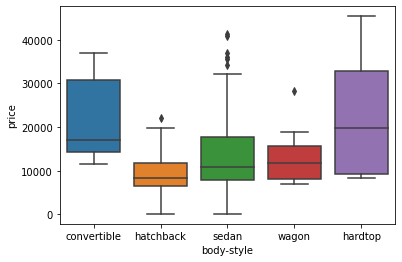

In [35]:
sns.boxplot(x='body-style', y='price', data=carros)

Como la distribución de precios entre diferentes carrocerías tiene diferentes superposiciones, este no debe de considerarse como un predictor del precio.

<h6>Engine-location y price<h6>

<AxesSubplot:xlabel='engine-location', ylabel='price'>

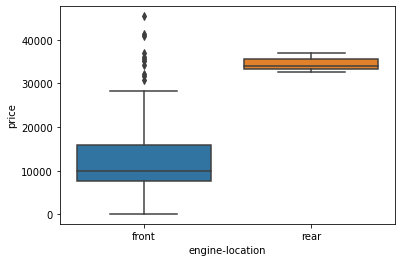

In [37]:
sns.boxplot(x='engine-location', y='price', data=carros)

Se puede observar que la distribución en las dos categorias de localización del motor son distintas, por tanto se podría considerar s esta variable como un buen predictor del precio.

<h6>Make of car y Price

<AxesSubplot:xlabel='make', ylabel='price'>

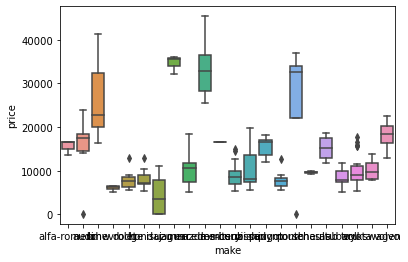

In [39]:
sns.boxplot(x='make', y='price', data=carros)

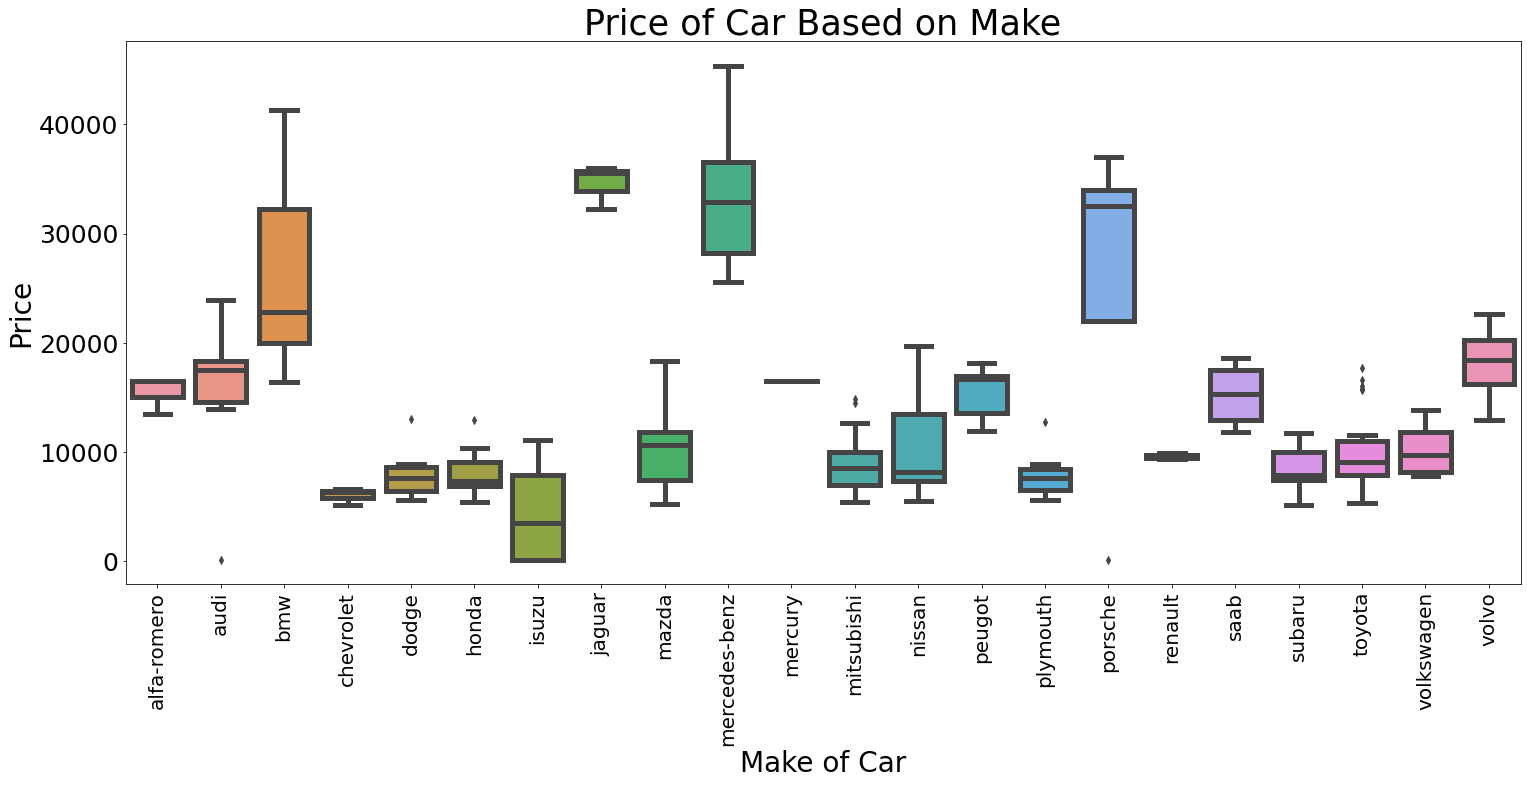

In [53]:
plt.rcParams['figure.figsize'] = (25,10)
ax = sns.boxplot(x='make', y='price', data=carros, width=0.8, linewidth=5)
ax.set_xlabel('Make of Car', fontsize=28)
ax.set_ylabel('Price', fontsize=28)
plt.title('Price of Car Based on Make', fontsize=35)
ax.tick_params(axis='x', labelsize=20, rotation=90)
ax.tick_params(axis='y', labelsize=25)

Se puede observar que los carros mas caros son el BMW, Mercedes Benz y el Porsche.

In [56]:
carros['engine-location'].value_counts().to_frame()

,engine-location
front,202
rear,3


Dado que solo 3 carros tienen motor trasero de 205, la ubicación del motor no es un buen predictor del precio ya que el resultado esta sesgado.

<h3>Encontrando valores faltantes

In [61]:
carros['num-of-doors'].unique()

array(['two', 'four', '?'], dtype=object)

In [62]:
carros['num-of-doors'].value_counts()

four    114
two      89
?         2
Name: num-of-doors, dtype: int64

In [64]:
cambio = carros['num-of-doors'].map({'two':2, 'four':4, '?':4})
carros['num-of-doors'] = cambio

In [66]:
carros['num-of-doors'].value_counts()

4    116
2     89
Name: num-of-doors, dtype: int64

<h3> Agupar por categoría y precio

<h6> Drive-wheels, body-style y price

In [74]:
df = carros[['drive-wheels','body-style','price']]

In [75]:
df_body_drive_price = df.groupby(['drive-wheels','body-style'], as_index=False).mean()
df_body_drive_price

,drive-wheels,body-style,price
0,4wd,hatchback,3853.500000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9471.175439
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


<h3> Pivot Table

In [76]:
table_pivot_price = df_body_drive_price.pivot(index='drive-wheels', columns='body-style')
table_pivot_price

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   3853.500000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9471.175439   
rwd              23949.6  24202.714286  13588.631579  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

<h6> Convertible

In [78]:
carros[carros['body-style'] == 'convertible']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
72,3,142,mercedes-benz,gas,std,2,convertible,rwd,front,96.6,...,234,mpfi,3.46,3.10,8.3,155,4750,16,18,35056
128,3,?,porsche,gas,std,2,convertible,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207,5900,17,25,37028
172,2,134,toyota,gas,std,2,convertible,rwd,front,98.4,...,146,mpfi,3.62,3.50,9.3,116,4800,24,30,17669
189,3,?,volkswagen,gas,std,2,convertible,fwd,front,94.5,...,109,mpfi,3.19,3.40,8.5,90,5500,24,29,11595
